# Лабораторная работа 2: Искусственный нейрон и перцептрон

Версия с одинаковыми гиперпараметрами (LR=0.1, Epochs=50) для всех.

## 1. Импорт библиотек и константы

In [10]:
import numpy as np
import matplotlib.pyplot as plt

SIZE = 100
SEED = 45
EPOCHS = 50
LEARNING_RATE = 0.01

## 2. Реализация функций активации (Задание 1)

In [11]:
# 1. Тождественная (Identity)
def identity(z):
    return z

# 2. Единичная ступенька (Step Function)
def step_function(z):
    return np.where(z >= 0, 1, 0)

# 3. Логистическая (Сигмоида)
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# 4. Гиперболический тангенс (th)
def tanh(z):
    return np.tanh(z)

# 5. Арктангенс (arctg)
def arctan(z):
    return np.arctan(z)

# --- Производные для обучения (Задание 2) ---

def identity_derivative(z):
    return np.ones_like(z)

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh_derivative(z):
    t = np.tanh(z)
    return 1 - t**2

def arctan_derivative(z):
    return 1 / (1 + z**2)

## 3. Генерация и визуализация данных

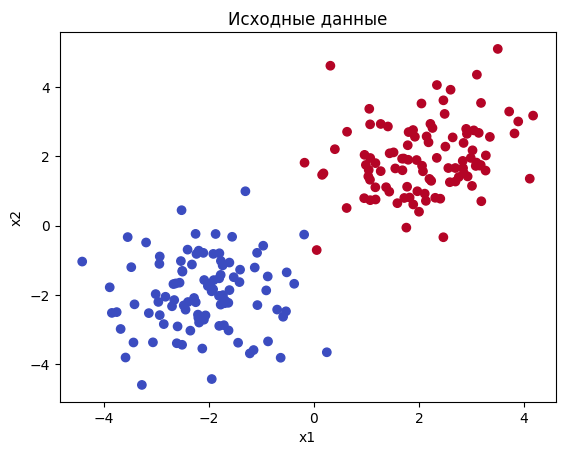

In [12]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 4. Вспомогательная функция для отрисовки

In [13]:
def plot_decision_boundary_v2(X, y, w, b, activation_fn, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z_linear = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = activation_fn(Z_linear)
    
    if activation_fn == tanh or activation_fn == arctan:
        Z_class = (Z > 0).astype(int)
    else:
        Z_class = (Z > 0.5).astype(int)

    Z_class = Z_class.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z_class, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

## 5. Изучение поведения (Задание 2)

### 5.1. Перцептрон (Единичная ступенька)

Эпоха 5/50 — точность: 0.9900
Эпоха 10/50 — точность: 0.9950
Эпоха 15/50 — точность: 0.9950
Эпоха 20/50 — точность: 0.9950
Эпоха 25/50 — точность: 1.0000
Эпоха 30/50 — точность: 1.0000
Эпоха 35/50 — точность: 1.0000
Эпоха 40/50 — точность: 1.0000
Эпоха 45/50 — точность: 1.0000
Эпоха 50/50 — точность: 1.0000


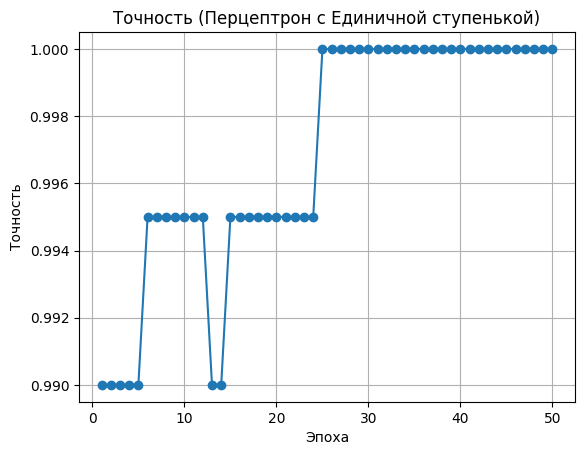

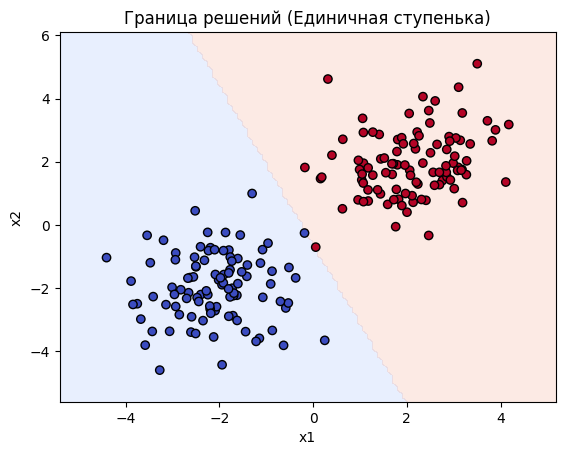

In [14]:
np.random.seed(SEED)
w_step = np.random.randn(2)
b_step = 0.0
losses = []

for epoch in range(EPOCHS):
    for i in range(len(X)):
        z = np.dot(X[i], w_step) + b_step
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred
        w_step += LEARNING_RATE * error * X[i]
        b_step += LEARNING_RATE * error
    
    preds = np.array([1 if np.dot(x, w_step) + b_step >= 0 else 0 for x in X])
    acc = (preds == y).mean()
    losses.append(1 - acc)
    if (epoch + 1) % 5 == 0:
        print(f"Эпоха {epoch+1}/{EPOCHS} — точность: {acc:.4f}")

plt.plot(range(1, EPOCHS + 1), [1 - l for l in losses], marker='o')
plt.title('Точность (Перцептрон с Единичной ступенькой)')
plt.xlabel('Эпоха'), plt.ylabel('Точность'), plt.grid(True), plt.show()

plot_decision_boundary_v2(X, y, w_step, b_step, step_function, 'Граница решений (Единичная ступенька)')

### 5.2. Нейрон с Sigmoid (Логистическая)

Эпоха 5/50 — Потери (BCE): 0.0379
Эпоха 10/50 — Потери (BCE): 0.0256
Эпоха 15/50 — Потери (BCE): 0.0212
Эпоха 20/50 — Потери (BCE): 0.0189
Эпоха 25/50 — Потери (BCE): 0.0174
Эпоха 30/50 — Потери (BCE): 0.0163
Эпоха 35/50 — Потери (BCE): 0.0155
Эпоха 40/50 — Потери (BCE): 0.0148
Эпоха 45/50 — Потери (BCE): 0.0143
Эпоха 50/50 — Потери (BCE): 0.0139


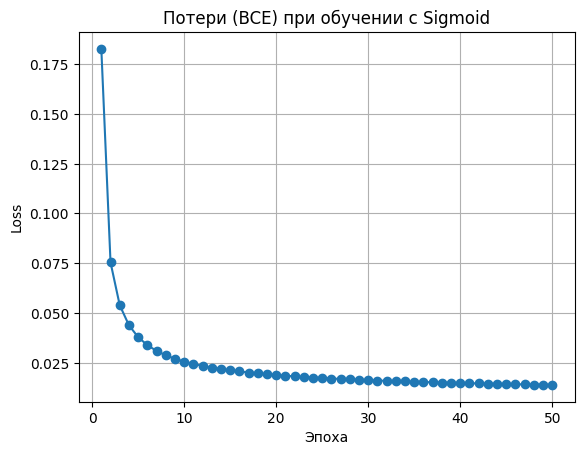

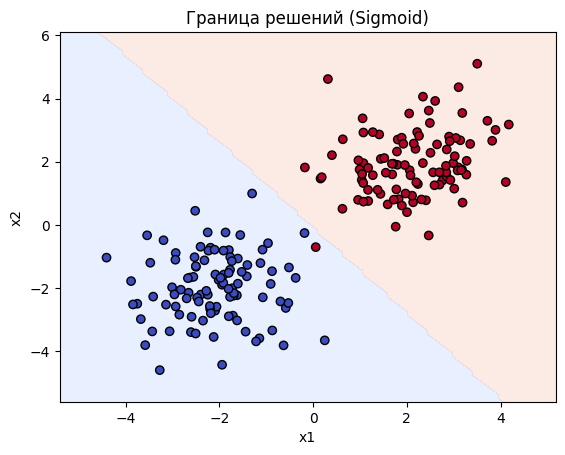

In [15]:
np.random.seed(SEED)
w_sigmoid = np.random.randn(2)
b_sigmoid = 0.0
losses_sigmoid = []

for epoch in range(EPOCHS):
    epoch_loss = 0
    for i in range(len(X)):
        z = np.dot(X[i], w_sigmoid) + b_sigmoid
        a = sigmoid(z)
        
        gradient_w = (a - y[i]) * X[i]
        gradient_b = (a - y[i])
        
        w_sigmoid -= LEARNING_RATE * gradient_w
        b_sigmoid -= LEARNING_RATE * gradient_b
        
        a_clipped = np.clip(a, 1e-10, 1 - 1e-10)
        epoch_loss += -(y[i] * np.log(a_clipped) + (1 - y[i]) * np.log(1 - a_clipped))

    losses_sigmoid.append(epoch_loss / len(X))
    if (epoch + 1) % 5 == 0:
        print(f"Эпоха {epoch+1}/{EPOCHS} — Потери (BCE): {losses_sigmoid[-1]:.4f}")

plt.plot(range(1, EPOCHS + 1), losses_sigmoid, marker='o')
plt.title('Потери (BCE) при обучении с Sigmoid')
plt.xlabel('Эпоха'), plt.ylabel('Loss'), plt.grid(True), plt.show()

plot_decision_boundary_v2(X, y, w_sigmoid, b_sigmoid, sigmoid, 'Граница решений (Sigmoid)')

### 5.3. Нейрон с Tanh (th)

Эпоха 5/50 — Потери (MSE): 0.0220
Эпоха 10/50 — Потери (MSE): 0.0179
Эпоха 15/50 — Потери (MSE): 0.0162
Эпоха 20/50 — Потери (MSE): 0.0151
Эпоха 25/50 — Потери (MSE): 0.0144
Эпоха 30/50 — Потери (MSE): 0.0138
Эпоха 35/50 — Потери (MSE): 0.0133
Эпоха 40/50 — Потери (MSE): 0.0129
Эпоха 45/50 — Потери (MSE): 0.0126
Эпоха 50/50 — Потери (MSE): 0.0123


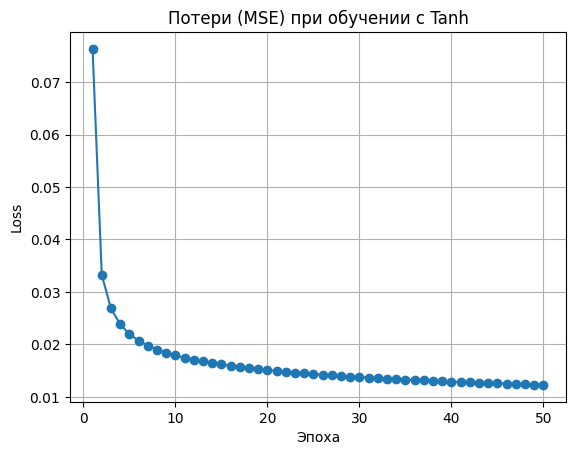

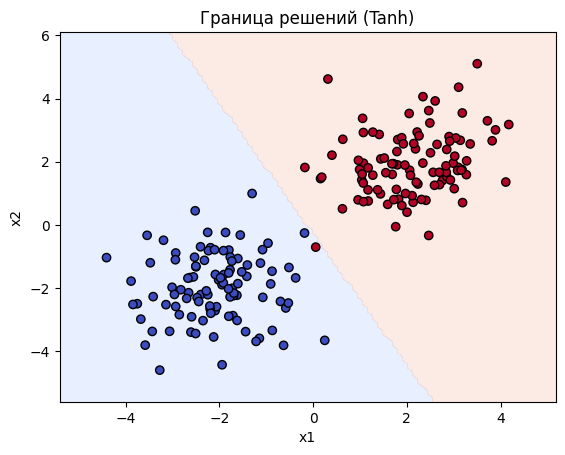

In [ ]:
y_tanh = (y * 2) - 1 

np.random.seed(SEED)
w_tanh = np.random.randn(2)
b_tanh = 0.0
losses_tanh = []

for epoch in range(EPOCHS):
    epoch_loss = 0
    for i in range(len(X)):
        z = np.dot(X[i], w_tanh) + b_tanh
        a = tanh(z)
        
        error_signal = (a - y_tanh[i]) * tanh_derivative(z)
        gradient_w = error_signal * X[i]
        gradient_b = error_signal
        
        w_tanh -= LEARNING_RATE * gradient_w
        b_tanh -= LEARNING_RATE * gradient_b
        epoch_loss += (a - y_tanh[i])**2

    losses_tanh.append(epoch_loss / len(X))
    if (epoch + 1) % 5 == 0:
        print(f"Эпоха {epoch+1}/{EPOCHS} — Потери (MSE): {losses_tanh[-1]:.4f}")

plt.plot(range(1, EPOCHS + 1), losses_tanh, marker='o')
plt.title('Потери (MSE) при обучении с Tanh')
plt.xlabel('Эпоха'), plt.ylabel('Loss'), plt.grid(True), plt.show()

plot_decision_boundary_v2(X, y, w_tanh, b_tanh, tanh, 'Граница решений (Tanh)')

### 5.4. Нейрон с Arctan (arctg)

Эпоха 5/50 — Потери (MSE): 0.0408
Эпоха 10/50 — Потери (MSE): 0.0398
Эпоха 15/50 — Потери (MSE): 0.0397
Эпоха 20/50 — Потери (MSE): 0.0397
Эпоха 25/50 — Потери (MSE): 0.0397
Эпоха 30/50 — Потери (MSE): 0.0397
Эпоха 35/50 — Потери (MSE): 0.0397
Эпоха 40/50 — Потери (MSE): 0.0397
Эпоха 45/50 — Потери (MSE): 0.0397
Эпоха 50/50 — Потери (MSE): 0.0397


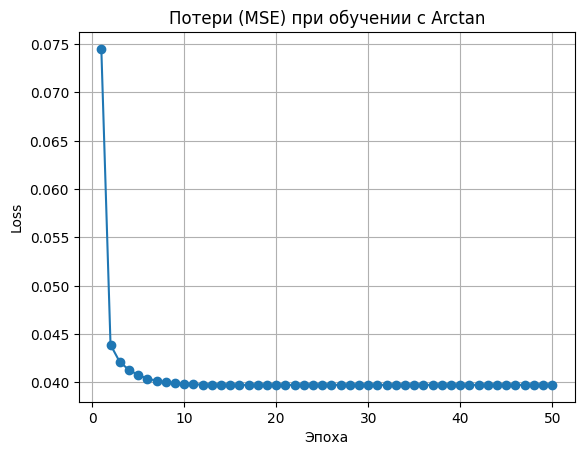

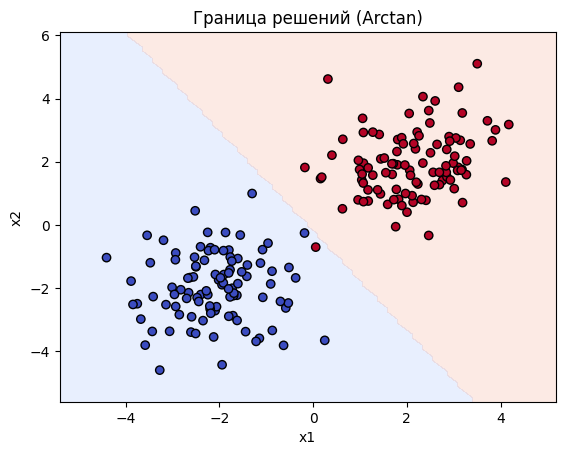

In [ ]:
y_arctan = (y * 2) - 1 

np.random.seed(SEED)
w_arctan = np.random.randn(2)
b_arctan = 0.0
losses_arctan = []

for epoch in range(EPOCHS):
    epoch_loss = 0
    for i in range(len(X)):
        z = np.dot(X[i], w_arctan) + b_arctan
        a = arctan(z)
        
        error_signal = (a - y_arctan[i]) * arctan_derivative(z)
        gradient_w = error_signal * X[i]
        gradient_b = error_signal
        
        w_arctan -= LEARNING_RATE * gradient_w
        b_arctan -= LEARNING_RATE * gradient_b
        epoch_loss += (a - y_arctan[i])**2

    losses_arctan.append(epoch_loss / len(X))
    if (epoch + 1) % 5 == 0:
        print(f"Эпоха {epoch+1}/{EPOCHS} — Потери (MSE): {losses_arctan[-1]:.4f}")

plt.plot(range(1, EPOCHS + 1), losses_arctan, marker='o')
plt.title('Потери (MSE) при обучении с Arctan')
plt.xlabel('Эпоха'), plt.ylabel('Loss'), plt.grid(True), plt.show()

plot_decision_boundary_v2(X, y, w_arctan, b_arctan, arctan, 'Граница решений (Arctan)')

### 5.5. Нейрон с Тождественной функцией (Identity)

Эпоха 5/50 — Потери (MSE): 0.0297
Эпоха 10/50 — Потери (MSE): 0.0297
Эпоха 15/50 — Потери (MSE): 0.0297
Эпоха 20/50 — Потери (MSE): 0.0297
Эпоха 25/50 — Потери (MSE): 0.0297
Эпоха 30/50 — Потери (MSE): 0.0297
Эпоха 35/50 — Потери (MSE): 0.0297
Эпоха 40/50 — Потери (MSE): 0.0297
Эпоха 45/50 — Потери (MSE): 0.0297
Эпоха 50/50 — Потери (MSE): 0.0297


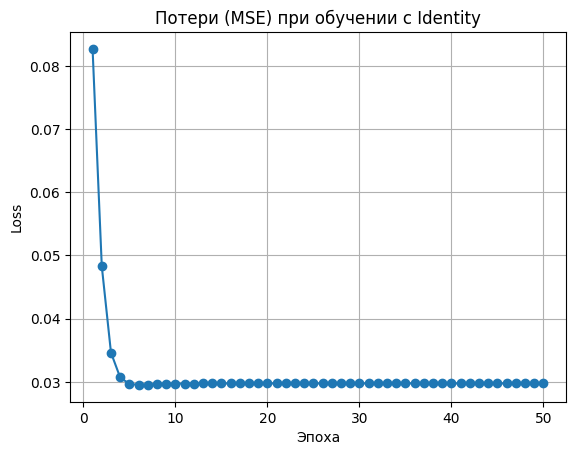

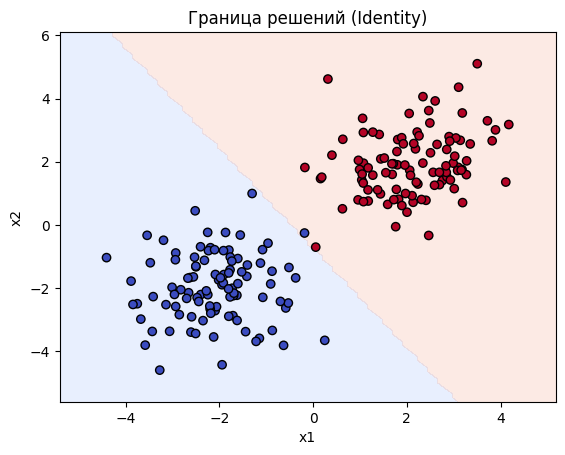

In [18]:
np.random.seed(SEED)
w_identity = np.random.randn(2)
b_identity = 0.0
losses_identity = []

for epoch in range(EPOCHS):
    epoch_loss = 0
    for i in range(len(X)):
        z = np.dot(X[i], w_identity) + b_identity
        a = identity(z)
        
        error_signal = (a - y[i]) * identity_derivative(z)
        gradient_w = error_signal * X[i]
        gradient_b = error_signal
        
        w_identity -= LEARNING_RATE * gradient_w
        b_identity -= LEARNING_RATE * gradient_b
        epoch_loss += (a - y[i])**2

    losses_identity.append(epoch_loss / len(X))
    if (epoch + 1) % 5 == 0:
        print(f"Эпоха {epoch+1}/{EPOCHS} — Потери (MSE): {losses_identity[-1]:.4f}")

plt.plot(range(1, EPOCHS + 1), losses_identity, marker='o')
plt.title('Потери (MSE) при обучении с Identity')
plt.xlabel('Эпоха'), plt.ylabel('Loss'), plt.grid(True), plt.show()

plot_decision_boundary_v2(X, y, w_identity, b_identity, identity, 'Граница решений (Identity)')

## 6. Ответы на вопросы (Задание 3)

1. Что делает функция активации в искусственном нейроне?

Функция активации выполняет две ключевые задачи:

1.  Вводит нелинейность: Это ее главная функция. Она позволяет нейронным сетям (особенно многослойным) аппроксимировать сложные, нелинейные зависимости в данных, которые невозможно описать простым линейным уравнением.
2.  Определяет выход: Она преобразует взвешенную сумму входов и смещения ($z = wx + b$) в итоговый выходной сигнал нейрона (например, сжимая его в диапазон `[0, 1]` у сигмоиды или `[-1, 1]` у tanh).

2. Чем отличается искусственный нейрон от однослойного перцептрона?

Искусственный нейрон — это базовая вычислительная единица (математическая функция), которая получает входы, вычисляет взвешенную сумму и применяет функцию активации.

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя таких нейронов.

    * Если в слое один нейрон, то "однослойный перцептрон" и "искусственный нейрон" по сути синонимы.

    * Если в слое несколько нейронов:
        * Все нейроны получают одни и те же входные данные.
        * Каждый нейрон имеет свой собственный набор весов ($w$) и смещение ($b$).
        * Общий выход перцептрона — это вектор, где каждый элемент является выходом одного из нейронов этого слоя.

3. Какое правило используется для обучения перцептрона?

Для обучения перцептронов  используется дельта-правило 

Это правило является методом градиентного спуска по поверхности ошибки. Веса корректируются итерационно, двигаясь в направлении, противоположном градиенту функции потерь (например, среднеквадратичной ошибки), чтобы минимизировать ошибку предсказания.


4. Почему однослойный перцептрон не может решить задачу XOR?

Однослойный перцептрон не может решить задачу XOR, потому что эта задача не является линейно разделимой.

Перцептрон, по своей сути, способен строить только линейные границы решений. В двумерном пространстве (как в задаче XOR) это означает, что он может провести только одну прямую линию для разделения классов.

Как видно на графике, невозможно провести одну прямую, которая бы корректно отделила точки класса 1 ( (0,1) и (1,0) ) от точек класса 0 ( (0,0) и (1,1) ).

5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?

(ReLU не было на вашем слайде, но вопрос присутствует в ноутбуке.)

При замене Sigmoid ($f(z) = 1 / (1 + e^{-z})$) на ReLU ($f(z) = \max(0, z)$) в нейроне:

* "Мертвые нейроны" (Dead Neurons): Главный недостаток ReLU. Функция имеет градиент, равный 0, для всех отрицательных входов ($z < 0$). Если веса нейрона во время обучения обновятся так, что его взвешенная сумма всегда будет отрицательной, нейрон "умирает": он перестает активироваться (выдает 0) и его веса больше не обновляются (градиент всегда 0).
* Несимметричность: ReLU несимметрична относительно нуля (ее выход всегда $\ge 0$). Это может вызывать смещение градиентов в одном направлении при обратном распространении ошибки, что иногда приводит к проблеме "расслоения" (clustering).
* Преимущество (Скорость): В отличие от сигмоиды (чья производная мала для больших $z$), у ReLU градиент равен 1 для всех $z > 0$. Это решает проблему "исчезающих градиентов" и позволяет градиентам легче протекать через глубокие сети, что значительно ускоряет обучение.